In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data=r'F:\Study\Machine Learning\Machine Learning A-Z (Codes and Datasets)\Part 4 - Clustering\Section 24 - K-Means Clustering\Python\Mall_Customers.csv'
customer_df=pd.read_csv(data)

In [ ]:
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_df.shape

(200, 5)

In [ ]:
customer_df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
customer_df['Genre']=le.fit_transform(customer_df['Genre'])

In [ ]:
customer_df['Genre'].dtype

dtype('int32')

In [ ]:
X=customer_df.iloc[:,1:].values

In [ ]:
X.shape

(200, 4)

## K-means Clustering

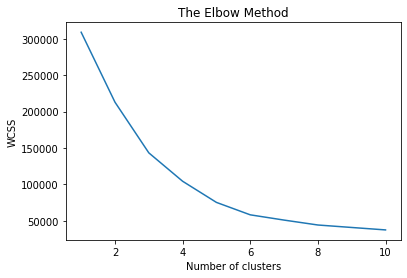

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#The graph shows optimal number of clusters to be 3 or 5
#But depending upon marketing team demand, no. of clusters can be decided
#For our analysis, no of clusters are 4

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
customer_df['cluster']=kmeans.fit_predict(X)
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


For different column combinations we'll see clusters

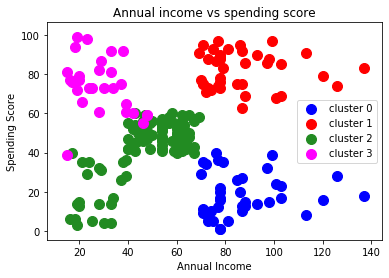

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],s=100,color='magenta',label='cluster 3')
plt.title('Annual income vs spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

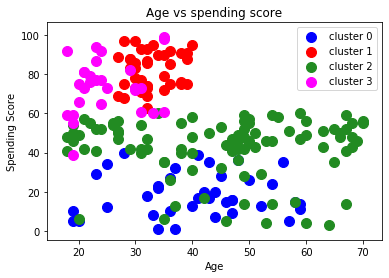

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Age'],customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Age'],customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Age'],customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Age'],customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],s=100,color='magenta',label='cluster 3')
plt.title('Age vs spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

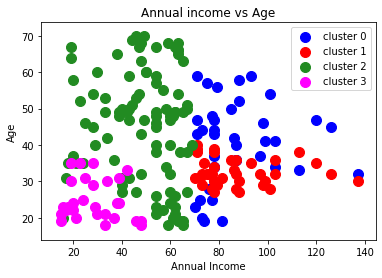

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==0,'Age'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==1,'Age'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==2,'Age'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==3,'Age'],s=100,color='magenta',label='cluster 3')
plt.title('Annual income vs Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()

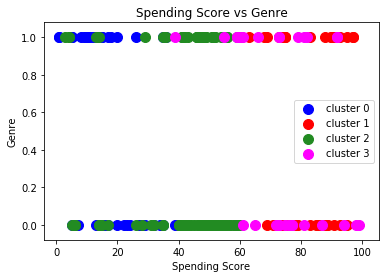

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==0,'Genre'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==1,'Genre'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==2,'Genre'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==3,'Genre'],s=100,color='magenta',label='cluster 3')
plt.title('Spending Score vs Genre')
plt.xlabel('Spending Score')
plt.ylabel('Genre')
plt.legend()

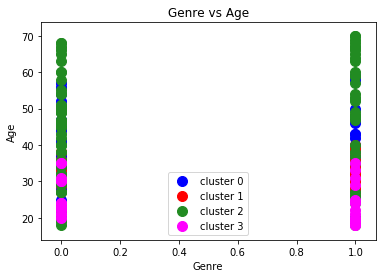

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Genre'],customer_df.loc[customer_df['cluster']==0,'Age'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Genre'],customer_df.loc[customer_df['cluster']==1,'Age'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Genre'],customer_df.loc[customer_df['cluster']==2,'Age'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Genre'],customer_df.loc[customer_df['cluster']==3,'Age'],s=100,color='magenta',label='cluster 3')
plt.title('Genre vs Age')
plt.xlabel('Genre')
plt.ylabel('Age')
plt.legend()

## Hierarchical Clustering

Text(0, 0.5, 'Distances')

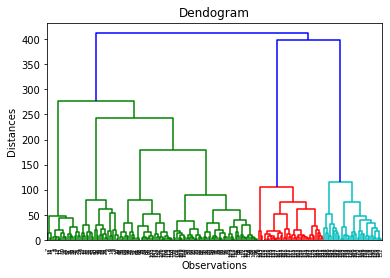

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distances')

In [ ]:
#From above dendrogram, optimal number of clusters are 6

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
customer_df['cluster'] = hc.fit_predict(X)

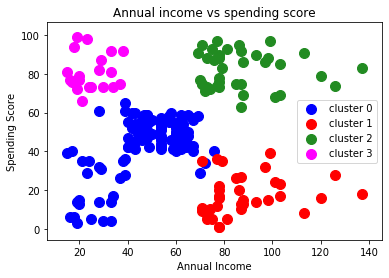

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],s=100,color='magenta',label='cluster 3')
plt.title('Annual income vs spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

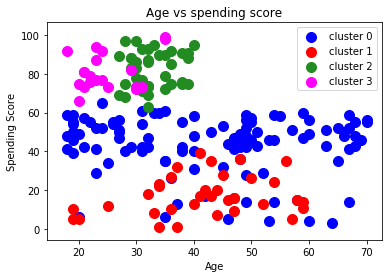

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Age'],customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Age'],customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Age'],customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Age'],customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],s=100,color='magenta',label='cluster 3')
plt.title('Age vs spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

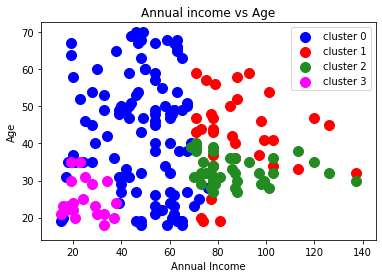

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==0,'Age'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==1,'Age'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==2,'Age'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Annual Income (k$)'],customer_df.loc[customer_df['cluster']==3,'Age'],s=100,color='magenta',label='cluster 3')
plt.title('Annual income vs Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()

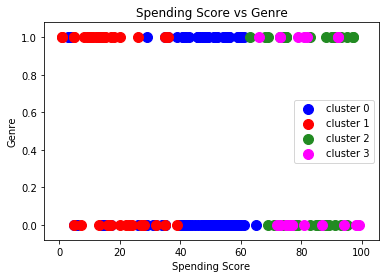

In [ ]:
plt.scatter(customer_df.loc[customer_df['cluster']==0,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==0,'Genre'],s=100,color='blue',label='cluster 0')
plt.scatter(customer_df.loc[customer_df['cluster']==1,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==1,'Genre'],s=100,color='red',label='cluster 1')
plt.scatter(customer_df.loc[customer_df['cluster']==2,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==2,'Genre'],s=100,color='forestgreen',label='cluster 2')
plt.scatter(customer_df.loc[customer_df['cluster']==3,'Spending Score (1-100)'],customer_df.loc[customer_df['cluster']==3,'Genre'],s=100,color='magenta',label='cluster 3')
plt.title('Spending Score vs Genre')
plt.xlabel('Spending Score')
plt.ylabel('Genre')
plt.legend()

Based on heirarchical clustering,
clusters may be:
1. Low income and Low spending customers.
2. Low income and high spending customers. These customers are also of less age
3. High income and less spending customers.
4. High income and high spending customers. These customers are also of less age
Most of the spending customers are of less age.